
# Data Preprocessing for Heart Disease Dataset

## 0-Getting all the UCI data from raw data to data table
This notebook addresses the data format inconsistencies found in four different datasets: `switzerland.data`, `hungarian.data`, `long-beach-va.data`, and `cleveland.data`. Each dataset contains a varying number of columns across lines, and `cleveland.data` has a line with `NULL` values after line 2820, which must be removed for consistency. The goal is to transform these datasets into a single CSV file with 76 columns that correspond to the full list of attributes.


# Data Column 

The following inconsistencies in column numbers were observed across different lines in the dataset. 

| Line Number | Number of Columns |
|-------------|-------------------|
| Line 1      | 7 columns         |
| Line 2      | 8 columns         |
| Line 3      | 8 columns         |
| Line 4      | 8 columns         |
| Line 5      | 8 columns         |
| Line 6      | 8 columns         |
| Line 7      | 8 columns         |
| Line 8      | 8 columns         |
| Line 9      | 8 columns         |
| Line 10     | 5 columns         |

- This pattern continues, with most lines matching the 76 attributes needed.

After observing these files, I found a repeating pattern every 10 lines, where data attributes align with a total of 76 columns. This pattern allows us to process the files by batching lines and assigning attribute names accordingly.

**Note:** The `cleveland.data` file contains `NULL` entries after line 2820. These lines were removed for processing.


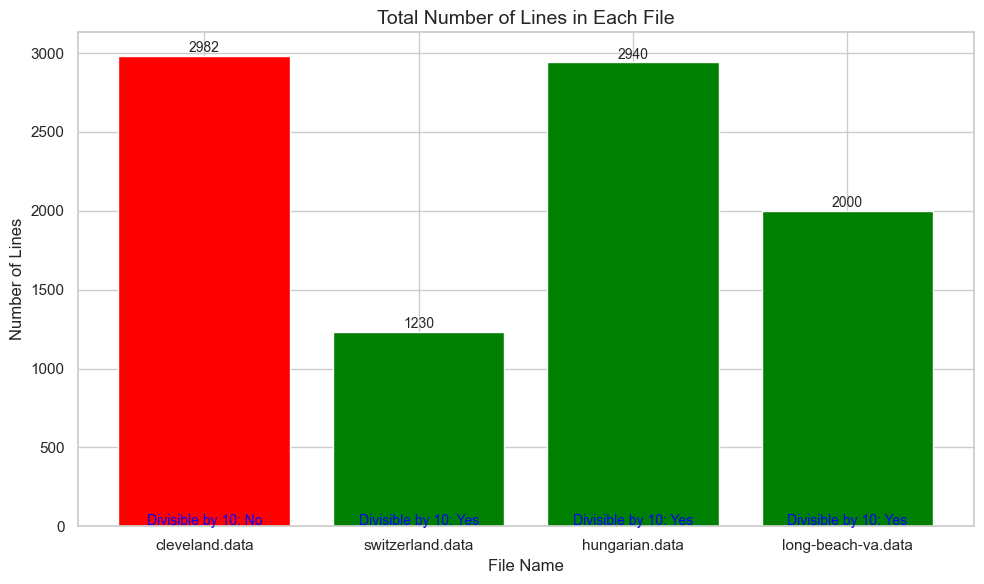

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

files = ['cleveland.data', 'switzerland.data', 'hungarian.data', 'long-beach-va.data']
file_data = {}

for file in files:
    with open(file, 'r', encoding='ISO-8859-1') as f:
        lines = f.readlines()
        file_data[file] = {
            'lines': len(lines),
            'divisible_by_10': len(lines) % 10 == 0
        }

sns.set(style="whitegrid")

file_names = list(file_data.keys())
line_counts = [file_data[file]['lines'] for file in file_names]
divisible_by_10 = ['Yes' if file_data[file]['divisible_by_10'] else 'No' for file in file_names]

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['green' if divisible == 'Yes' else 'red' for divisible in divisible_by_10]

ax.bar(file_names, line_counts, color=colors)

ax.set_title("Total Number of Lines in Each File", fontsize=14)
ax.set_xlabel("File Name", fontsize=12)
ax.set_ylabel("Number of Lines", fontsize=12)

for i, count in enumerate(line_counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

for i, divisible in enumerate(divisible_by_10):
    ax.text(i, -10, f'Divisible by 10: {divisible}', ha='center', va='bottom', fontsize=10, color='blue')

plt.tight_layout()
plt.show()


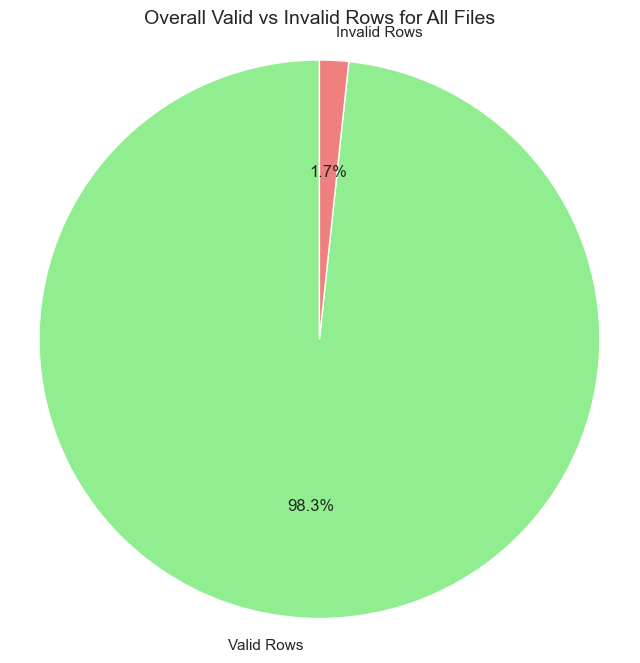

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

files = ['cleveland.data', 'switzerland.data', 'hungarian.data', 'long-beach-va.data']
file_data = {}

expected_columns_per_line = [7, 8, 8, 8, 8, 8, 8, 8, 8, 5]  

total_valid_rows = 0
total_invalid_rows = 0

for file in files:
    with open(file, 'r', encoding='ISO-8859-1') as f:
        lines = f.readlines()
        
        valid_rows = 0
        invalid_rows = 0
        
        for i, line in enumerate(lines):
            line_columns = len(line.split())  
            expected_columns = expected_columns_per_line[i % 10]  
                
            if line_columns == expected_columns:
                valid_rows += 1
            else:
                invalid_rows += 1
        
        total_valid_rows += valid_rows
        total_invalid_rows += invalid_rows

sns.set(style="whitegrid")

labels = ['Valid Rows', 'Invalid Rows']
sizes = [total_valid_rows, total_invalid_rows]
colors = ['lightgreen', 'lightcoral']

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')  
ax.set_title("Overall Valid vs Invalid Rows for All Files", fontsize=14)

plt.show()


In [ ]:
import pandas as pd

# with open('cleveland.data', 'r',encoding='ISO-8859-1') as file:
with open('switzerland.data', 'r') as file:
    lines = file.readlines()
    
sample_size = 10  
combined_data = []

for i in range(0, len(lines), sample_size):
    sample = []
    for j in range(sample_size):
        if i + j < len(lines): 
            columns = lines[i + j].strip().split()  
            sample.extend(columns)  
    combined_data.append(sample)

columns = [
    'id', 'ccf', 'age', 'sex', 'painloc', 'painexer', 'relrest', 'pncaden', 'cp', 
    'trestbps', 'htn', 'chol', 'smoke', 'cigs', 'years', 'fbs', 'dm', 'famhist', 
    'restecg', 'ekgmo', 'ekgday', 'ekgyr', 'dig', 'prop', 'nitr', 'pro', 'diuretic', 
    'proto', 'thaldur', 'thaltime', 'met', 'thalach', 'thalrest', 'tpeakbps', 'tpeakbpd', 
    'dummy', 'trestbpd', 'exang', 'xhypo', 'oldpeak', 'slope', 'rldv5', 'rldv5e', 'ca', 
    'restckm', 'exerckm', 'restef', 'restwm', 'exeref', 'exerwm', 'thal', 'thalsev', 
    'thalpul', 'earlobe', 'cmo', 'cday', 'cyr', 'num', 'lmt', 'ladprox', 'laddist', 
    'diag', 'cxmain', 'ramus', 'om1', 'om2', 'rcaprox', 'rcadist', 'lvx1', 'lvx2', 
    'lvx3', 'lvx4', 'lvf', 'cathef', 'junk', 'name'
]

df = pd.DataFrame(combined_data, columns=columns)

print("\nMerged DataFrame (first few rows):")
print(df.head())

df.to_csv('switzerland_merged.csv', index=False)




Merged DataFrame (first few rows):
     id ccf age sex painloc painexer relrest pncaden cp trestbps  ... rcaprox  \
0  3001   0  65   1       1        1       1      -9  4      115  ...       1   
1  3002   0  32   1       0        0       0      -9  1       95  ...       1   
2  3003   0  61   1       1        1       1      -9  4      105  ...       2   
3  3004   0  50   1       1        1       1      -9  4      145  ...       1   
4  3005   0  57   1       1        1       1      -9  4      110  ...       2   

  rcadist lvx1 lvx2 lvx3 lvx4 lvf cathef junk  name  
0       1    1    1    1    1   1     75  -9.  name  
1       1    1    1    1    5   1     63  -9.  name  
2       1    1    1    1    1   1     67  -9.  name  
3       1    1    1    1    5   4     36  -9.  name  
4       1    1    1    1    1   1     60  -9.  name  

[5 rows x 76 columns]


# 1.1-Information on each (relevant) attribute/feature’s data type

### 1. `id`
- **Description**: A unique identification number assigned to each patient for tracking purposes. It is used as a key identifier for each record.
- **Data Type**: Integer

### 2. `ccf`
- **Description**: Social Security Number (SSN) of the patient. For privacy reasons, the SSN is replaced with a dummy value of 0.
- **Data Type**: Integer

### 3. `age`
- **Description**: The age of the patient in years. This is a continuous variable representing how old the patient is at the time of the data collection.
- **Data Type**: Integer

### 4. `sex`
- **Description**: The biological sex of the patient. The values are coded as:
    - `1`: Male
    - `0`: Female
- **Data Type**: Integer

### 5. `painloc`
- **Description**: Indicates the location of the chest pain. 
    - `1`: Substernal (pain beneath the sternum)
    - `0`: Other locations (indicating chest pain is not substernal)
- **Data Type**: Integer

### 6. `painexer`
- **Description**: Whether the chest pain is provoked by exertion or physical activity. 
    - `1`: Yes, the pain occurs during exertion
    - `0`: No, the pain is not related to exertion
- **Data Type**: Integer

### 7. `relrest`
- **Description**: Whether the chest pain is relieved after rest.
    - `1`: Yes, pain is relieved after rest
    - `0`: No, pain is not relieved by resting
- **Data Type**: Integer

### 8. `pncaden`
- **Description**: A cumulative score representing the chest pain characteristics based on the attributes `painloc`, `painexer`, and `relrest`. It is the sum of these three variables, which together describe the patient's chest pain pattern.
- **Data Type**: Integer

### 9. `cp`
- **Description**: Type of chest pain experienced by the patient. The values are coded as:
    - `1`: Typical angina (pain occurs during physical exertion and is relieved by rest)
    - `2`: Atypical angina (less predictable, may not follow typical patterns)
    - `3`: Non-anginal pain (chest pain that is not related to heart problems)
    - `4`: Asymptomatic (no chest pain or symptoms)
- **Data Type**: Categorical (Integer)

### 10. `trestbps`
- **Description**: The patient's resting blood pressure, measured in millimeters of mercury (mm Hg). This value is typically obtained while the patient is at rest.
- **Data Type**: Integer

### 11. `htn`
- **Description**: Unknown
- **Data Type**: Integer(binary)

### 12. `chol`
- **Description**: The patient's serum cholesterol level, measured in milligrams per deciliter (mg/dl). Cholesterol levels are indicative of cardiovascular health.
- **Data Type**: Integer

### 13. `smoke`
- **Description**: Indicates whether the patient is a smoker.
    - `1`: Smoker (the patient currently smokes)
    - `0`: Non-smoker (the patient does not smoke)
- **Data Type**: Integer

### 14. `cigs`
- **Description**: The number of cigarettes the patient smokes per day. This is a continuous variable that quantifies smoking habits.
- **Data Type**: Integer

### 15. `years`
- **Description**: The number of years the patient has been smoking. This reflects the duration of the patient's smoking habit.
- **Data Type**: Integer

### 16. `fbs`
- **Description**: Indicates whether the patient's fasting blood sugar level is greater than 120 mg/dl.
    - `1`: True, the fasting blood sugar level is greater than 120 mg/dl
    - `0`: False, the fasting blood sugar level is less than or equal to 120 mg/dl
- **Data Type**: Integer

### 17. `dm`
- **Description**: Indicates whether the patient has a history of diabetes.
    - `1`: Yes, the patient has a history of diabetes
    - `0`: No, the patient does not have diabetes
- **Data Type**: Integer

### 18. `famhist`
- **Description**: Indicates whether there is a family history of coronary artery disease.
    - `1`: Yes, the patient has a family history of coronary artery disease
    - `0`: No, the patient does not have a family history of coronary artery disease
- **Data Type**: Integer

### 19. `restecg`
- **Description**: The results of the resting electrocardiogram (ECG) test. This test evaluates the electrical activity of the heart to check for irregularities.
    - `0`: Normal
    - `1`: ST-T wave abnormality (abnormalities in the heart's electrical activity)
    - `2`: Probable or definite left ventricular hypertrophy (LVH) (thickening of the heart's left ventricle)
- **Data Type**: Categorical (Integer)


### 20-22. `ekgmo`, `ekgday`, `ekgyr`
- **Description**: The date when the exercise electrocardiogram (ECG) reading was taken. The data is split into three variables:
    - `ekgmo`: Month of the ECG reading.
    - `ekgday`: Day of the ECG reading.
    - `ekgyr`: Year of the ECG reading.
- **Data Type**: Integer (for each variable)

### 23. `dig`
- **Description**: Indicates whether digitalis (a medication) was used during the exercise ECG.
    - `1`: Yes, digitalis was used
    - `0`: No, digitalis was not used
- **Data Type**: Integer

### 24. `prop`
- **Description**: Indicates whether a beta-blocker was used during the exercise ECG.
    - `1`: Yes, beta-blocker was used
    - `0`: No, beta-blocker was not used
- **Data Type**: Integer

### 25. `nitr`
- **Description**: Indicates whether nitrates were used during the exercise ECG.
    - `1`: Yes, nitrates were used
    - `0`: No, nitrates were not used
- **Data Type**: Integer

### 26. `pro`
- **Description**: Indicates whether a calcium channel blocker was used during the exercise ECG.
    - `1`: Yes, calcium channel blocker was used
    - `0`: No, calcium channel blocker was not used
- **Data Type**: Integer

### 27. `diuretic`
- **Description**: Indicates whether a diuretic (a medication that helps remove excess fluids) was used during the exercise ECG.
    - `1`: Yes, diuretic was used
    - `0`: No, diuretic was not used
- **Data Type**: Integer

### 28. `proto`
- **Description**: The type of exercise protocol used during the ECG exercise test. The values represent different types of protocols such as Bruce, Kottus, Balke, etc.
    - `1` to `12`: Various exercise protocols used to assess heart function under stress.
- **Data Type**: Categorical (Integer)

### 29. `thaldur`
- **Description**: The duration of the exercise test, measured in minutes. This represents how long the patient was able to perform the exercise.
- **Data Type**: Float

### 30. `thaltime`
- **Description**: The time (in minutes) when ST depression (a sign of ischemia or lack of oxygen in the heart) was first noted during the exercise.
- **Data Type**: Float

### 31. `met`
- **Description**: The number of metabolic equivalents (METs) achieved during the exercise test. METs are used to measure the intensity of exercise, with 1 MET being the energy expenditure while at rest.
- **Data Type**: Float

### 32. `thalach`
- **Description**: The maximum heart rate achieved during the exercise test, measured in beats per minute (bpm). This is an indicator of the patient's cardiovascular response to exercise.
- **Data Type**: Integer

### 33. `thalrest`
- **Description**: The resting heart rate of the patient, measured in beats per minute (bpm), before starting the exercise test.
- **Data Type**: Integer

### 34-35. `tpeakbps`, `tpeakbpd`
- **Description**: The peak blood pressure measurements during the exercise ECG, both systolic and diastolic.
    - `tpeakbps`: Peak systolic blood pressure achieved during the exercise.
    - `tpeakbpd`: Peak diastolic blood pressure achieved during the exercise.
- **Data Type**: Integer (for each)

### 36. `dummy`
- **Description**:Unknown
- **Data Type**: Unknown

### 37. `trestbpd`
- **Description**: The resting diastolic blood pressure of the patient, measured in mm Hg. This value is taken when the patient is at rest.
- **Data Type**: Integer

### 38. `exang`
- **Description**: Indicates whether the patient experienced exercise-induced angina (chest pain during physical activity).
    - `1`: Yes, the patient had exercise-induced angina
    - `0`: No, the patient did not experience angina during exercise
- **Data Type**: Integer

### 39. `xhypo`
- **Description**: This variable is unknown but is possibly related to hypotension (low blood pressure).
    - `1`: Yes, may indicate hypotension
    - `0`: No, no indication of hypotension
- **Data Type**: Integer

### 40. `oldpeak`
- **Description**: The amount of ST depression observed during exercise, relative to the resting state. ST depression is a sign of ischemia or reduced oxygen supply to the heart muscle.
- **Data Type**: Float
### 41. `slope`
- **Description**: The slope of the peak exercise ST segment, which helps assess the heart's electrical activity during exercise. The values are:
    - `1`: Upsloping (indicating improved electrical activity during exercise)
    - `2`: Flat (indicating no significant change in electrical activity)
    - `3`: Downsloping (indicating a potential issue, such as ischemia)
- **Data Type**: Categorical (Integer)

### 42-43. `rldv5`, `rldv5e`
- **Description**: These variables represent the height measurements of the patient at two stages:
    - `rldv5`: Height at rest (before exercise)
    - `rldv5e`: Height at peak exercise (after exercise)
- **Data Type**: Float (for each)

### 44. `ca`
- **Description**: The number of major coronary arteries that show significant narrowing, identified by fluoroscopy (a type of X-ray imaging). This value helps assess the extent of coronary artery disease.
- **Data Type**: Integer

### 45-46. `restckm`, `exerckm`
- **Description**: These attributes are considered irrelevant and do not contribute to the analysis of the data.
- **Data Type**: Unknown

### 47. `restef`
- **Description**: The resting radionuclide ejection fraction (EF), which measures the percentage of blood being pumped out of the left ventricle with each heartbeat while at rest. A normal EF is typically above 50%.
- **Data Type**: Float

### 48. `restwm`
- **Description**: Indicates the resting wall motion abnormality in the heart, based on imaging results. The values are:
    - `0`: None (no wall motion abnormality)
    - `1`: Mild or moderate (slight abnormality)
    - `2`: Moderate or severe (more noticeable abnormality)
    - `3`: Akinesis or dyskinesis (complete loss of motion or abnormal movement)
- **Data Type**: Categorical (Integer)

### 49. `exeref`
- **Description**: The exercise radionuclide ejection fraction (EF), which measures the percentage of blood ejected from the left ventricle during exercise. This is similar to the resting EF but during physical activity.
- **Data Type**: Float

### 50. `exerwm`
- **Description**: Indicates the presence of wall motion abnormalities during exercise. This variable captures any issues with the heart's wall movement when stressed by exercise.
- **Data Type**: Categorical (Integer)

### 51. `thal`
- **Description**: The result of a thallium heart scan, which is used to detect areas of reduced blood flow in the heart. The values are:
    - `3`: Normal (no issues detected)
    - `6`: Fixed defect (permanent abnormality, often due to scar tissue)
    - `7`: Reversible defect (temporary abnormality, usually caused by ischemia)
- **Data Type**: Categorical (Integer)

### 52-54. `thalsev`, `thalpul`, `earlobe`
- **Description**: Not Used
- **Data Type**: Unknown

### 55-57. `cmo`,`cday`, `cyr`
- **Description**: The day and year of the cardiac catheterization procedure. The data is split into 3 variables:
    - `cmo` : Month of cardiac cath (sp?)  (perhaps "call")
    - `cday`: Day of the cardiac catheterization.
    - `cyr`: Year of the cardiac catheterization.
- **Data Type**: Integer (for each)

### 58. `num`
- **Description**: A binary variable that indicates the diagnosis of heart disease based on angiographic findings, which assess the narrowing of coronary arteries:
    - `0`: Less than 50% diameter narrowing (no significant blockage)
    - `1`: More than 50% diameter narrowing (indicating significant coronary artery disease)
- **Data Type**: Integer

### 59-68. `lmt` to `rcadist`
- **Description**: These variables represent the vessels affected by coronary artery disease, recorded as binary values (indicating presence or absence of disease in each vessel):
    - `lmt`: Left main coronary artery
    - `rcadist`: Right coronary artery distal (further sections of the right coronary artery)
    - Similar variables exist for other coronary arteries.
- **Data Type**: Integer (for each)

### 69-73. `lvx1` to `lvx5`
- **Description**: Unknown
- **Data Type**: Unknown

### 74-76. `lvf`, `cathef`, `junk`
- **Description**: Unknown
- **Data Type**: Unknown


In [129]:
import pandas as pd

cleveland_df = pd.read_csv('cleveland_merged.csv')
hungarian_df = pd.read_csv('hungarians_merged.csv')
long_beach_df = pd.read_csv('long-beach-va_merged.csv')
switzerland_df = pd.read_csv('switzerland_merged.csv')

combined_df = pd.concat([cleveland_df, hungarian_df, long_beach_df, switzerland_df], ignore_index=True)

print(f"Combined DataFrame shape: {combined_df.shape}")
print(combined_df.head())

combined_df.to_csv('merged_all_data.csv', index=False)

print("The data has been successfully merged and saved as 'merged_all_data.csv'.")




Combined DataFrame shape: (899, 76)
   id  ccf  age  sex  painloc  painexer  relrest  pncaden  cp  trestbps  ...  \
0   1    0   63    1       -9        -9       -9       -9   1       145  ...   
1   2    0   67    1       -9        -9       -9       -9   4       160  ...   
2   3    0   67    1       -9        -9       -9       -9   4       120  ...   
3   4    0   37    1       -9        -9       -9       -9   3       130  ...   
4   6    0   41    0       -9        -9       -9       -9   2       130  ...   

   rcaprox  rcadist  lvx1  lvx2  lvx3  lvx4  lvf  cathef  junk  name  
0        1        1     1     1     1     1    1    -9.0  -9.0  name  
1        1        1     1     1     1     1    1    -9.0  -9.0  name  
2        2        2     1     1     1     7    3    -9.0  -9.0  name  
3        1        1     1     1     1     1    1    -9.0  -9.0  name  
4        1        1     1     1     1     1    1    -9.0  -9.0  name  

[5 rows x 76 columns]
The data has been successfully mer

# Diabetes Analysis Task Warning

## Data Quality Issue in Attribute/Feature `dm`

As we declared in our previous email to you, of all the 76 attributes, only 1 dm is related to diabetes. The `dm` attribute is expected to have values of either 0 or 1. However, a significant number of entries in the dataset have a value of -9. According to the official documentation provided by the dataset’s author, this dataset has been primarily used for heart disease analysis over the years, and the `dm` attribute has never been utilized in any analysis. As a result, there is no explanation available for the meaning of `dm` values being -9.

This lack of explanation makes it impossible for us to **impute** a meaningful value for -9. Simply **ignoring or removing** rows with -9 values would drastically reduce the dataset size from 899 samples to only 80, which would severely compromise the analysis. Therefore, the data quality for using this dataset in diabetes-related analysis is extremely poor.

We will continue to analyze the dataset despite this limitation, but we cannot guarantee that the results will be reliable or applicable in practice.

## Next Steps

To handle the -9 values, we will perform the following steps to proceed with a random forest analysis:

1. **Remove** rows where `dm` equals -9.
2. **Replace** `dm` values of -9 with 0.
3. **Replace** `dm` values of -9 with 1.

Each approach will be analyzed to understand its impact on the results.


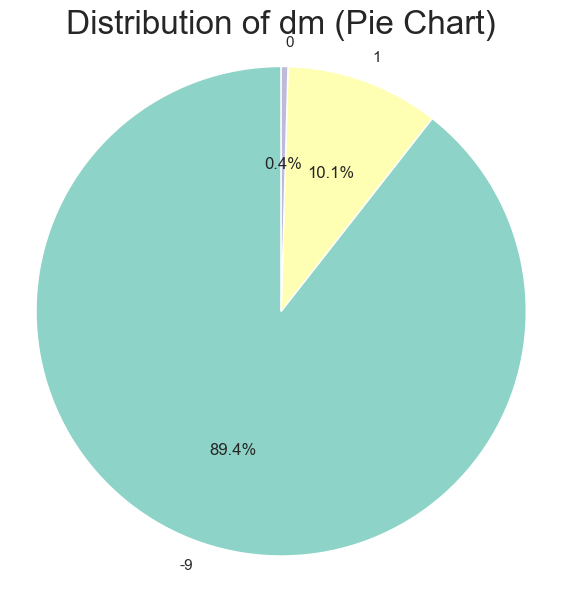

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_dm_distribution(file_path):
    data = pd.read_csv(file_path)

    dm_counts = data["dm"].value_counts()

    sns.set(style="whitegrid")
    plt.figure(figsize=(7, 7))
    plt.pie(dm_counts, labels=dm_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(dm_counts)))
    plt.title("Distribution of dm (Pie Chart)", fontsize=24)
    plt.axis('equal')  
    plt.show()

file_path = "merged_all_data.csv"
visualize_dm_distribution(file_path)


# Too many Attributes

Feature Importance Analysis with Random Forest for Diabetes Data

So here it is hoped that the random forest algorithm will be used to select the attributes that are relevant to the analysis of this diabetes task. These meaningless columns (e.g. id, ccf, lvx1, etc.) are removed directly from the data in data preprocessing.



### Processing strategy: remove ###

Mean Squared Error: 0.007510005263157896
Feature importance saved to feature_importance_remove.txt


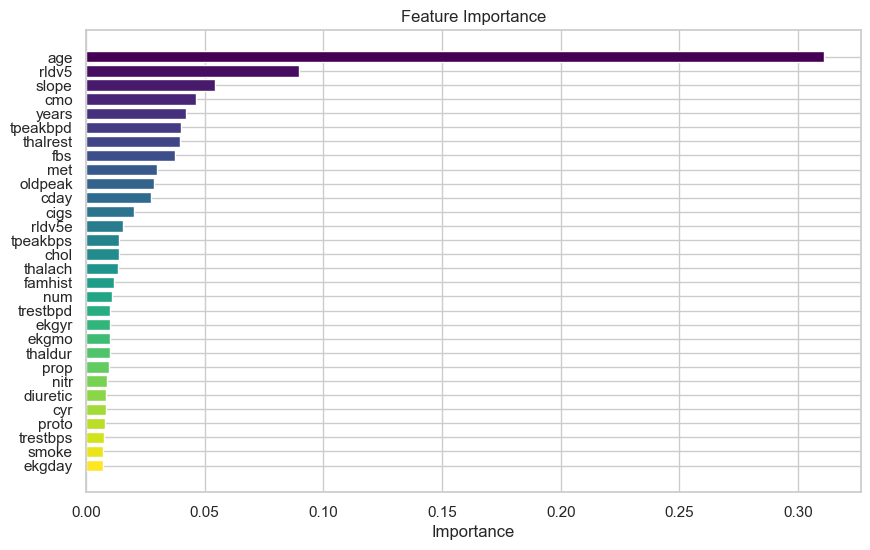


### Processing strategy: replace_with_0 ###

Mean Squared Error: 0.010010537263626251
Feature importance saved to feature_importance_replace_with_0.txt


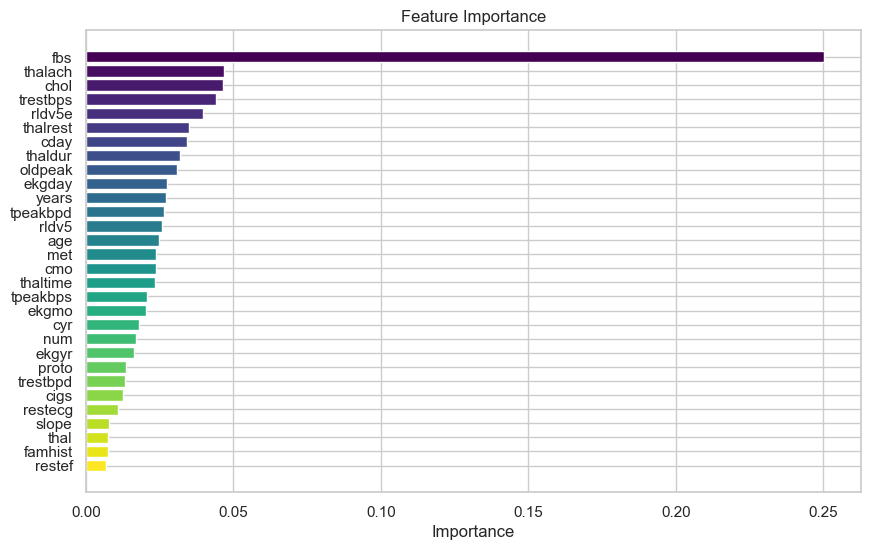


### Processing strategy: replace_with_1 ###

Mean Squared Error: 0.0007092155172413793
Feature importance saved to feature_importance_replace_with_1.txt


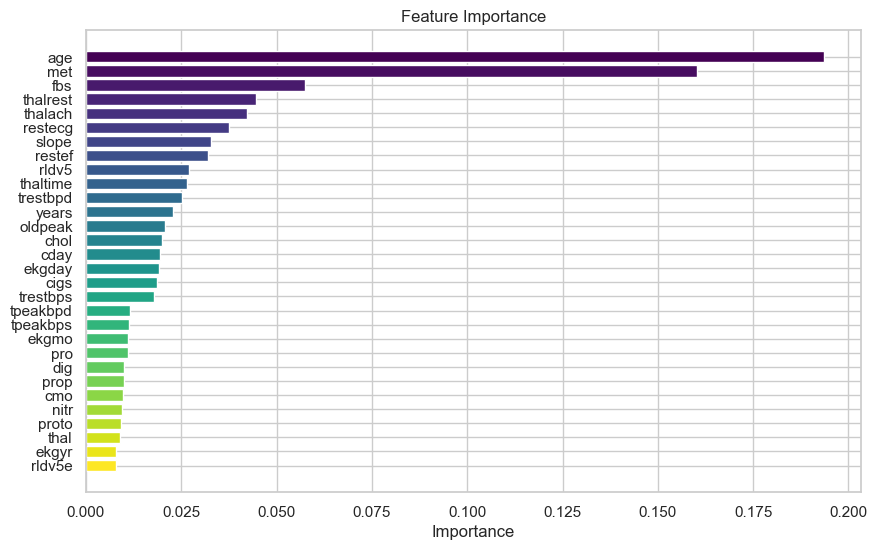

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def evaluate_feature_importance(model, feature_names):
    importance = model.feature_importances_
    feature_scores = pd.DataFrame({"Feature": feature_names, "Importance": importance})
    feature_scores = feature_scores.sort_values(by="Importance", ascending=False).reset_index(drop=True)
    return feature_scores

def plot_feature_importance(feature_scores):
    plt.figure(figsize=(10, 6))
    
    colors = cm.viridis(np.linspace(0, 1, len(feature_scores)))
    
    bars = plt.barh(feature_scores["Feature"], feature_scores["Importance"], color=colors)
    
    plt.xlabel("Importance")
    plt.title("Feature Importance")
    plt.gca().invert_yaxis()  
    plt.show()
    
def save_feature_importance_to_txt(feature_scores, file_name="feature_importance.txt"):
    with open(file_name, "w") as file:
        file.write("Features by Importance:\n")
        for idx, row in feature_scores.iterrows():
            file.write(f"{row['Feature']}: {row['Importance']}\n")
    print(f"Feature importance saved to {file_name}")

def preprocess_data(file_path, dm_strategy):
    data = pd.read_csv(file_path)

    
    columns_to_remove = [
        "dummy", "htn", "id", "ccf", "thalsev", "thalpul", "earlobe", "lmt", 
        "ladprox", "laddist", "diag", "cxmain", "ramus", "om1", "om2", 
        "rcaprox", "rcadist", "lvx1", "lvx2", "lvx3", "lvx4", "lvf", 
        "cathef", "junk", "name"
    ]
    
    data = data.drop(columns=columns_to_remove, errors="ignore")

    if dm_strategy == "remove":
        data = data[data["dm"] != -9]
    elif dm_strategy == "replace_with_0":
        data["dm"] = data["dm"].replace(-9, 0)
    elif dm_strategy == "replace_with_1":
        data["dm"] = data["dm"].replace(-9, 1)

    X = data.drop(columns=["dm"])
    y = data["dm"]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler, X.columns



def train_random_forest(X, y, n_estimators=100, max_depth=None):
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X, y)
    return model


def test_model(X, y_true, model):
    y_pred = model.predict(X)
    mse = mean_squared_error(y_true, y_pred)
    print(f"Mean Squared Error: {mse}")
    return y_true, y_pred


if __name__ == "__main__":
    file_path = "merged_all_data.csv"

    dm_strategies = ["remove", "replace_with_0", "replace_with_1"]

    for strategy in dm_strategies:
        print(f"\n### Processing strategy: {strategy} ###\n")
        
        X, y, scaler, feature_names = preprocess_data(file_path, dm_strategy=strategy)

        model = train_random_forest(X, y, n_estimators=2000, max_depth=100)
        
        y_true, predictions = test_model(X, y, model)
        
        feature_scores = evaluate_feature_importance(model, feature_names)
        
        save_feature_importance_to_txt(
            feature_scores,
            file_name=f"feature_importance_{strategy}.txt"
        )
        
        plot_feature_importance(feature_scores[:30])


# Selected Attributes for Analysis

After the algorithm selection and analysis, in fact, for we still do not know dm this -9 error value should be how to do, and got the above figure 1 and figure 2 of the very weird results, is a certain attribute (eg. **fbs**) has a very importance of whether the diabetes or not, the value of -9 replaced by 1 to get the results of the figure 3 seems to be more balanced, but also just our **simulation** and analysis results, not necessarily the real situation

So we manually extracted the following **20 important attributes**, mostly derived from the intersection of the important influence attributes of the three cases. In addition, the attribute “lvx2, cathef, dummy, junk” has been excluded as the authors did not consider it useful. To avoid redundancy, the focus will be mainly on these attributes during  the **data preprocessing phase**. Deletions can be added at a later stage if necessary.

## Selected Attributes
- dm
- age
- fbs
- thalach
- thalrest
- years
- oldpeak
- cday
- rldv5
- met
- trestbps
- sex
- chol
- tpeakbpd
- tpeakbps
- cigs
- restecg
- slope
- ekgday
- trestbpd


## Notes
- These attributes will serve as the primary focus for data preprocessing to ensure concise and meaningful analysis.
- Any redundant or irrelevant data will be excluded during preprocessing.
- If required, censored or less relevant attributes can be revisited and incorporated in later stages of analysis.


In [137]:
import pandas as pd
df = pd.read_csv('merged_all_data.csv')
diabetes_related_columns_extended = [
    'dm','age','fbs', 'thalach', 'thalrest', 'years', 'oldpeak', 'cday', 'rldv5', 'met', 
    'trestbps', 'sex', 'chol', 'tpeakbpd', 'tpeakbps', 'cigs', 'restecg', 
    'slope', 'ekgday', 'trestbpd'
]
extended_diabetes_data = df[diabetes_related_columns_extended]
extended_diabetes_data = extended_diabetes_data.dropna()  
extended_diabetes_data.to_csv('extended_diabetes_related_data.csv', index=False)


# 1.2-Distribution of values on each relevant attribute

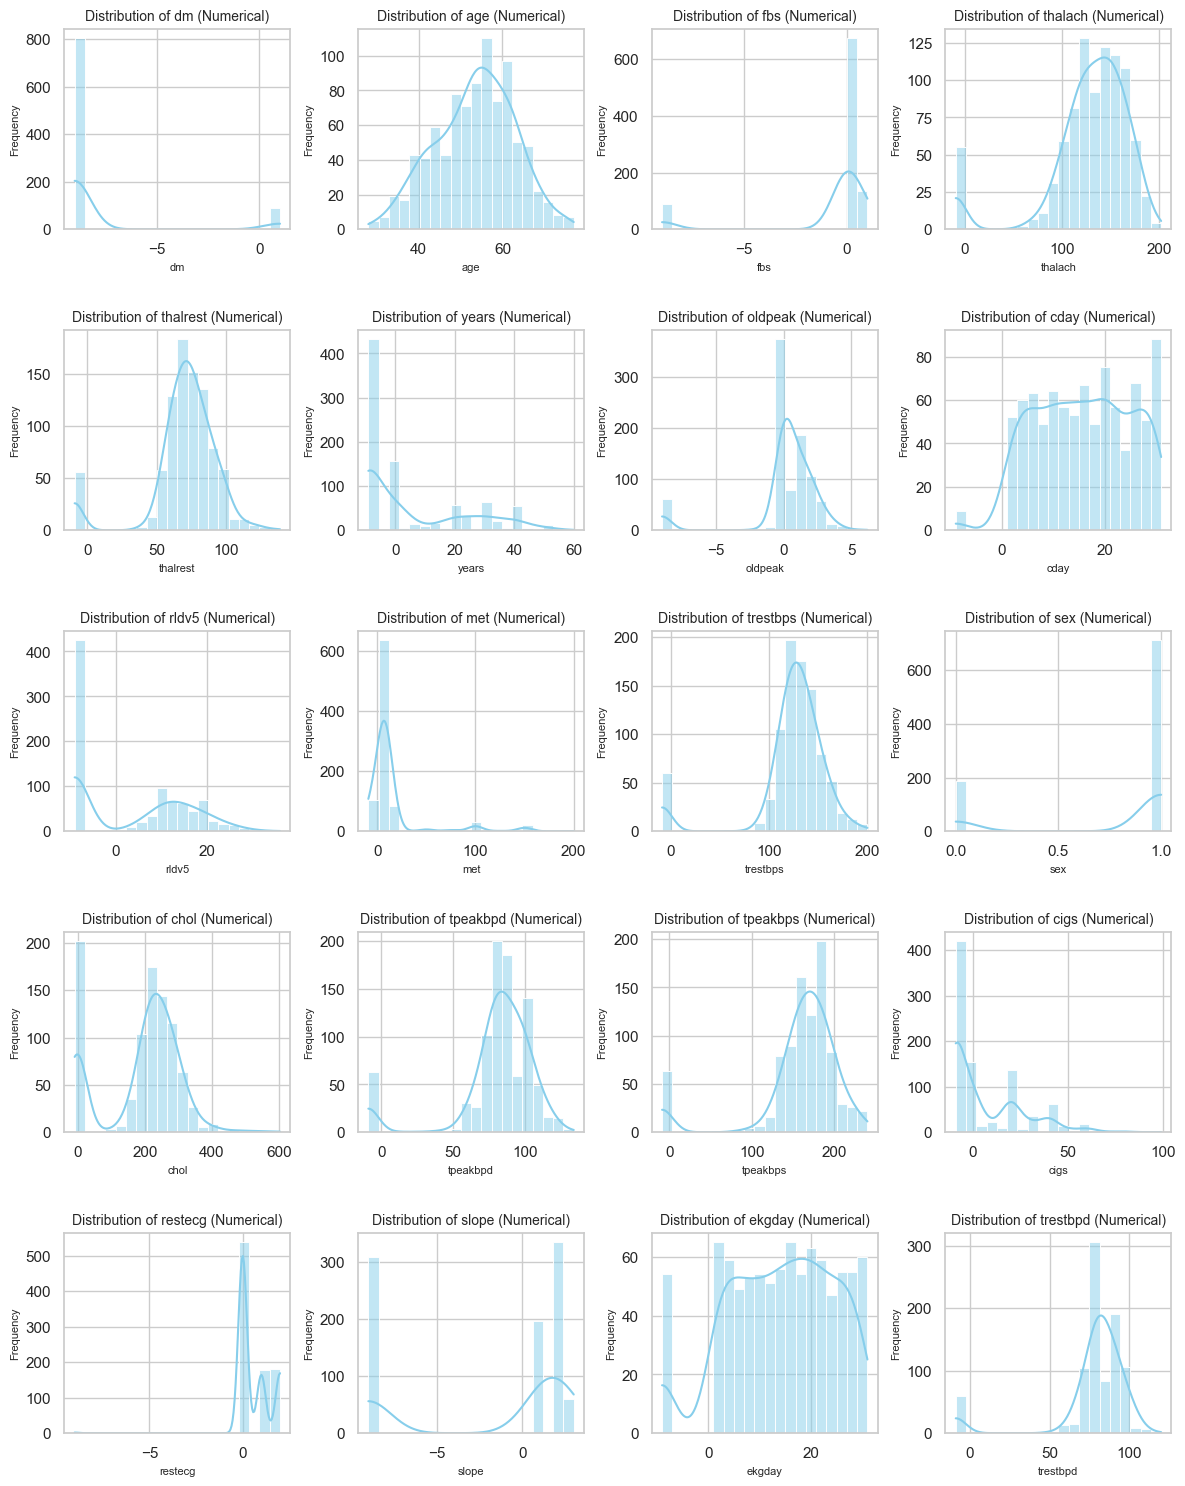

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('extended_diabetes_related_data.csv')

sns.set(style="whitegrid")

num_features = len(df.columns)
ncols = 4  
nrows = (num_features + 1) // ncols  

fig, axes = plt.subplots(nrows, ncols, figsize=(12, nrows * 3))

for i, column in enumerate(df.columns):
    ax = axes[i // ncols, i % ncols]  
    

    sns.histplot(df[column], ax=ax, kde=True, color='skyblue', bins=20)
    ax.set_title(f'Distribution of {column} (Numerical)', fontsize=10)
    
    ax.set_xlabel(column, fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

plt.tight_layout(pad=1.0) 
plt.subplots_adjust(hspace=0.5, wspace=0.3)  

plt.show()


# 2.1-Amount of missing values
No missing values found

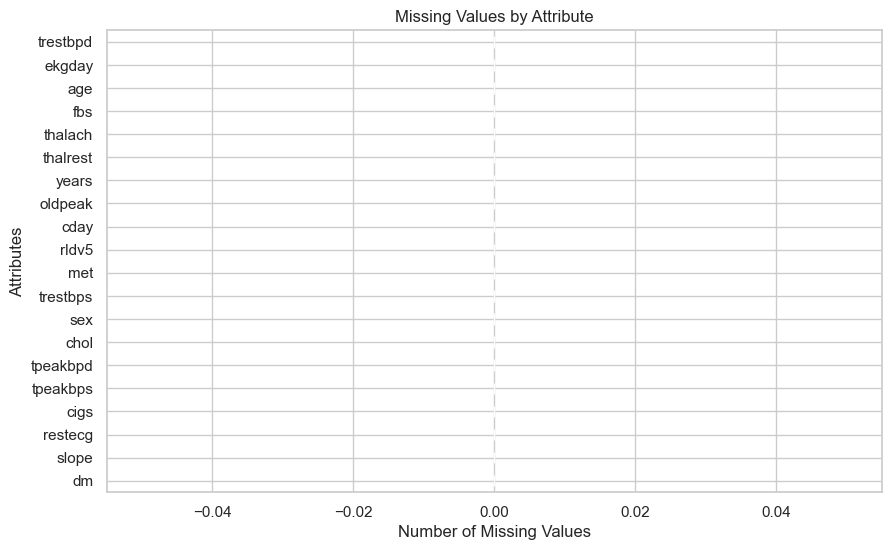

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('extended_diabetes_related_data.csv')

missing_values = df.isnull().sum()

plt.figure(figsize=(10, 6))
missing_values.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Number of Missing Values')
plt.ylabel('Attributes')
plt.title('Missing Values by Attribute')
plt.show()


# 2.2-Presence of extreme values/outliers

As **dm** attribute has been explained earlier, he has 90% of the values of -9, which is illegal, so the outlier detection ignores this attribute for now.

Outliers were identified using the IQR method and visualized by color bar charts.


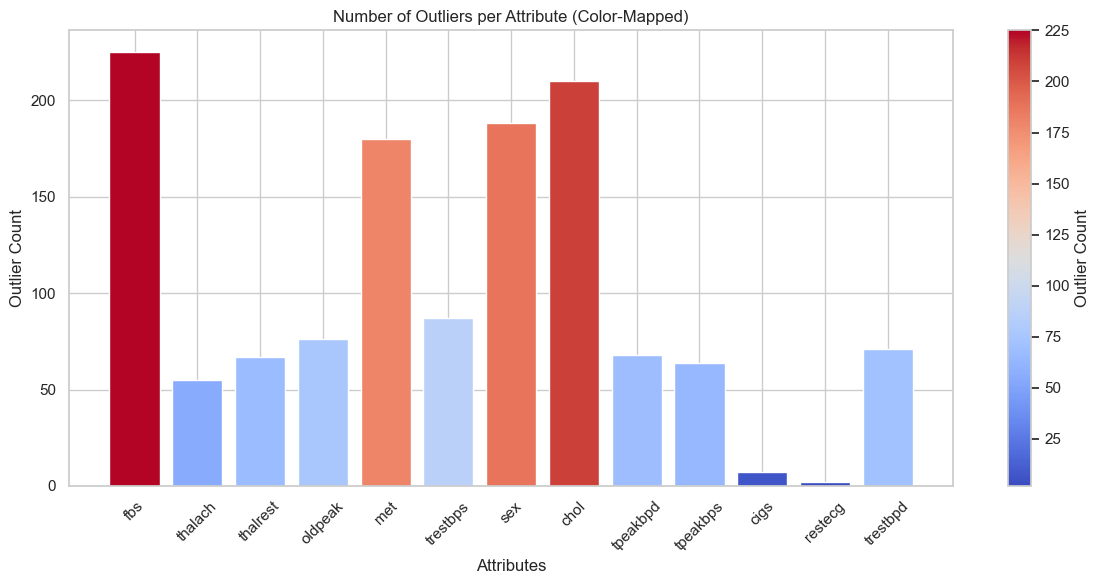

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

df = pd.read_csv('extended_diabetes_related_data.csv').drop(columns=["dm"])

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numerical_columns = df.select_dtypes(include=[np.number]).columns
outliers_summary = {}

for col in numerical_columns:
    outliers = detect_outliers_iqr(df, col)
    outliers_summary[col] = len(outliers)

outliers_df = pd.DataFrame.from_dict(outliers_summary, orient='index', columns=['Outlier Count'])
outliers_df = outliers_df[outliers_df['Outlier Count'] > 0]  

counts = outliers_df['Outlier Count']
norm = Normalize(vmin=counts.min(), vmax=counts.max())
colors = plt.cm.coolwarm(norm(counts.values))

plt.figure(figsize=(12, 6))
bars = plt.bar(outliers_df.index, outliers_df['Outlier Count'], color=colors)

sm = ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Outlier Count')

plt.title('Number of Outliers per Attribute (Color-Mapped)')
plt.xlabel('Attributes')
plt.ylabel('Outlier Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2.2-Consistency 

## 1. Numerical Consistency

For numerical features, to ensure that the values fall within a reasonable and expected range.

- **Age (age)**: 
  - The value should be a positive number.
  - The age typically falls between 0 and 120 years.
  
- **Height (rldv5)**:
  - Height values should range from 50 cm to 250 cm.
  
- **Blood Pressure (trestbps, tpeakbpd, tpeakbps)**:
  - Blood pressure values are expected to range from 0 to 300 mm Hg.
  
- **METS (met)**:
  - METS values usually do not exceed 100.
  
- **Smoking Years (years)**:
  - The value should not be negative and should not typically exceed 90 years.

## 2. Categorical Consistency

For categorical variables, the values align with predefined categories.

- **Fasting Blood Sugar (fbs)**:
  - The value should only be `0` or `1`, representing different levels of blood sugar.

- **Resting Electrocardiographic Results (restecg)**:
  - The values should be restricted to `0`, `1`, or `2`, which represent different electrocardiographic results.

- **Slope (slope)**:
  - The values should be `1`, `2`, or `3`, indicating the slope of the peak exercise ST segment.

## 3. Temporal Consistency

For temporal data:

- **Date Fields (e.g., ekgday, cday)**:
  - Dates should be within a reasonable range 


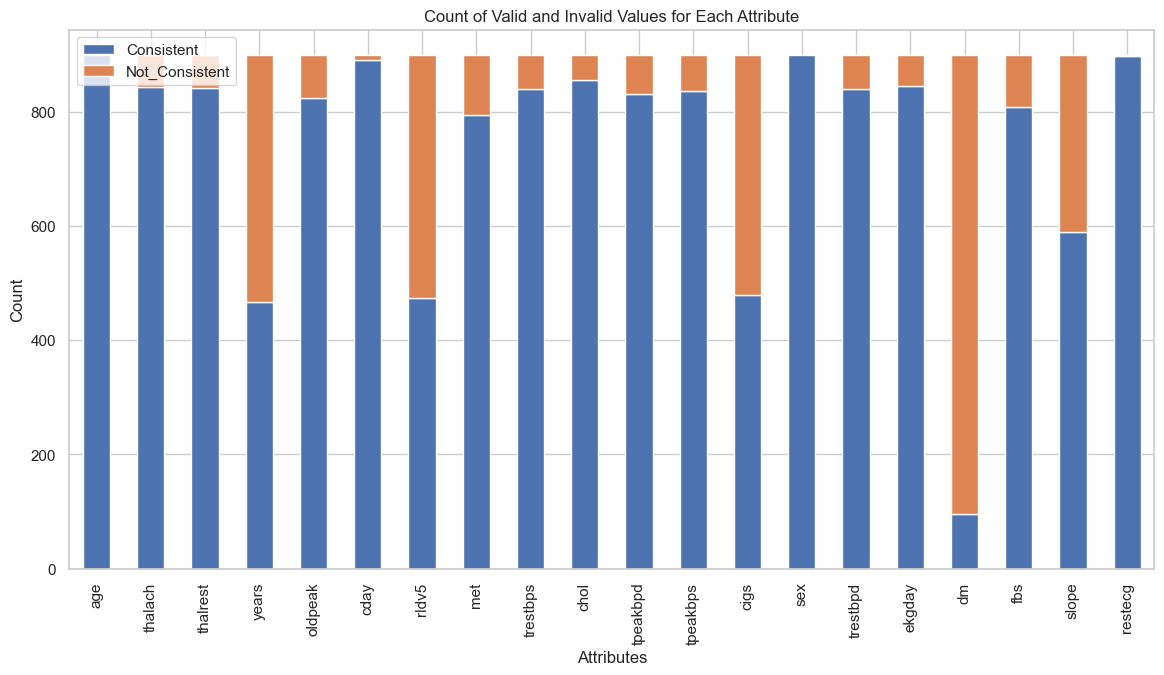

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('extended_diabetes_related_data.csv')

sns.set(style="whitegrid")

numerical_checks = {
    'age': (0, 120),
    'thalach': (0, 220),
    'thalrest': (40, 200),
    'years': (0, 100),
    'oldpeak': (0, 6),
    'cday': (0, 200),
    'rldv5': (0, 250),
    'met': (0, 200),
    'trestbps': (50, 250),
    'chol': (0, 400),
    'tpeakbpd': (50, 250),
    'tpeakbps': (50, 250),
    'cigs': (0, 100),
    'sex': (-0.1, 1.1),
    'trestbpd': (50, 250),
    'ekgday': (0, 200),
    'dm': (-0.1, 1.1),  
    'fbs':(-0.1, 1.1),  
    'slope':(0.9, 3.1), 
    'restecg':(0-0.1, 2.1), 
}

consistency_df = pd.DataFrame(index=numerical_checks.keys(), columns=['Consistent', 'Not_Consistent'])

for column, bounds in numerical_checks.items():
    valid = df[column].between(bounds[0], bounds[1])
    consistency_df.loc[column, 'Consistent'] = valid.sum()
    consistency_df.loc[column, 'Not_Consistent'] = (~valid).sum()

consistency_df.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Count of Valid and Invalid Values for Each Attribute')
plt.ylabel('Count')
plt.xlabel('Attributes')
plt.show()


# 2.3-Validity 

By checking if the value is "-9" which means the error data.

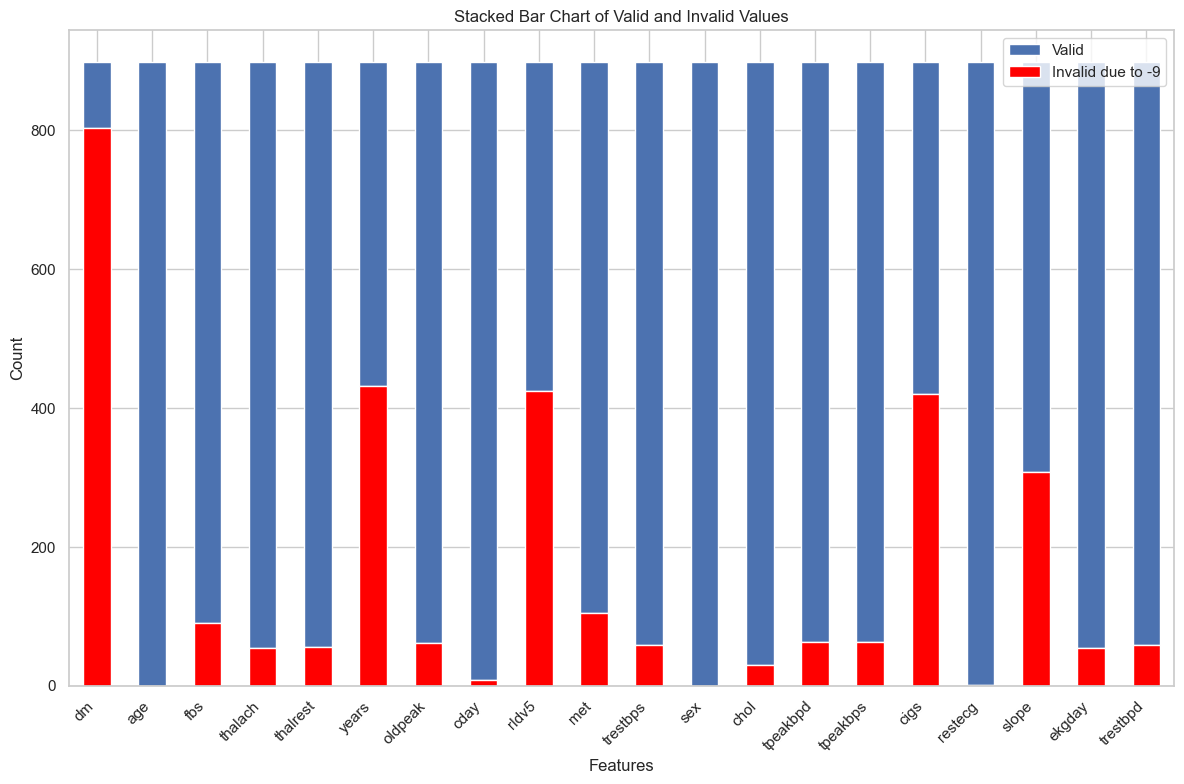

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('extended_diabetes_related_data.csv')

invalid_due_to_minus9 = (df == -9).sum()


valid_values = df.shape[0] - invalid_due_to_minus9

summary_df = pd.DataFrame({
    'Valid': valid_values,
    'Invalid due to -9': invalid_due_to_minus9
})

fig, ax = plt.subplots(figsize=(12, 8))

summary_df['Valid'].plot(kind='bar', stacked=True, ax=ax, bottom=summary_df[['Invalid due to -9']].sum(axis=1), label='Valid')

summary_df[['Invalid due to -9']].plot(kind='bar', stacked=True, ax=ax, color=['red'], label='Invalid due to -9')


ax.set_ylabel('Count')
ax.set_xlabel('Features')
ax.set_title('Stacked Bar Chart of Valid and Invalid Values')
ax.set_xticklabels(df.columns, rotation=45, ha='right')

ax.legend()

plt.tight_layout()
plt.show()


# 2.4-Goals for Data Visualization and Modeling

1. **Identifying Attribute-Based Relationships**  
   - Provide a clear and comprehensive visualization of overall data relationships.  
   
2. **Finding High-Risk Groups**  
   - Visualize clusters of high-risk groups.  
   - Use binning of individual attributes for more granular analysis.  
   - Highlight and visualize potential high-risk attribute combinations for diabetes.  

3. **What-If Analysis**  
   - Create an interactive channel for users to query specific attributes.  
   - Support analysis for all attributes or a subset of attributes.  
   - Return the probability of diabetes risk based on user-defined conditions.

# Steps to Prepare Data for These Goals

1. **Data Cleaning**  
   - Reduce the dataset from 76 attributes to a focused subset.  
   - Exclude irrelevant attributes such as IDs, dummy variables, and non-diabetes-related features.  

2. **Handling Missing Values**  
   - Use deep learning models to impute missing values.  
   - Ensure visualization accuracy by preserving as much true value as possible.

3. **Feature Selection and Modeling**  
   - Identify high-quality attributes similar to the approach for heart disease datasets (e.g., reducing to 20 key features).  
   - Apply deep learning models to identify high-risk attribute combinations.  
   - Create custom pipelines to support user-defined attribute selection for What-If analysis.
   - Enable user interaction for dynamic risk assessments based on selected attributes.

# 3.1-Data wrangling progress and results

- The **`dm` attribute** has only about **10% valid values**, which makes it the critical attribute for identifying diabetes presence.  
- I decided to **remove all invalid values** (marked as `-9`).  
- **Reason:**  
  - Filling in the missing values with a model would mean analyzing **artificially simulated data**, leading to unreliable insights.  
  - Unfortunately, only **10% of the dataset is truly usable** for diabetes-related analysis.  

**Action:**  
- Filter out invalid `-9` values to ensure the remaining data is genuine and reliable for analysis.

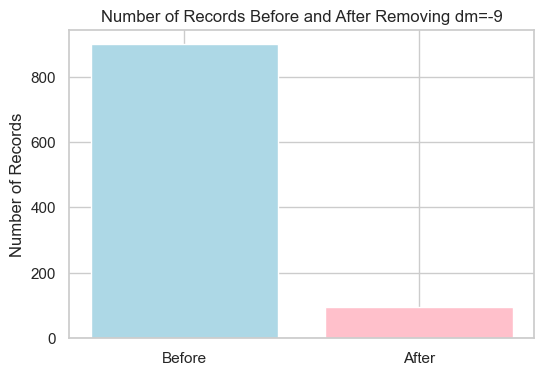

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('extended_diabetes_related_data.csv')

before_count = len(df)

df = df[df['dm'] != -9]

after_count = len(df)

plt.figure(figsize=(6, 4))
plt.bar(['Before', 'After'], [before_count, after_count], color=['lightblue', 'pink'])

plt.ylabel('Number of Records')
plt.title('Number of Records Before and After Removing dm=-9')
plt.show()
df.to_csv('cleaned_diabetes_data.csv', index=False)


- After performing a second **validity analysis** on the cleaned data, the results confirm:  
  - **Invalid values have significantly decreased**.  
  - However, **some invalid values still remain** in the dataset.


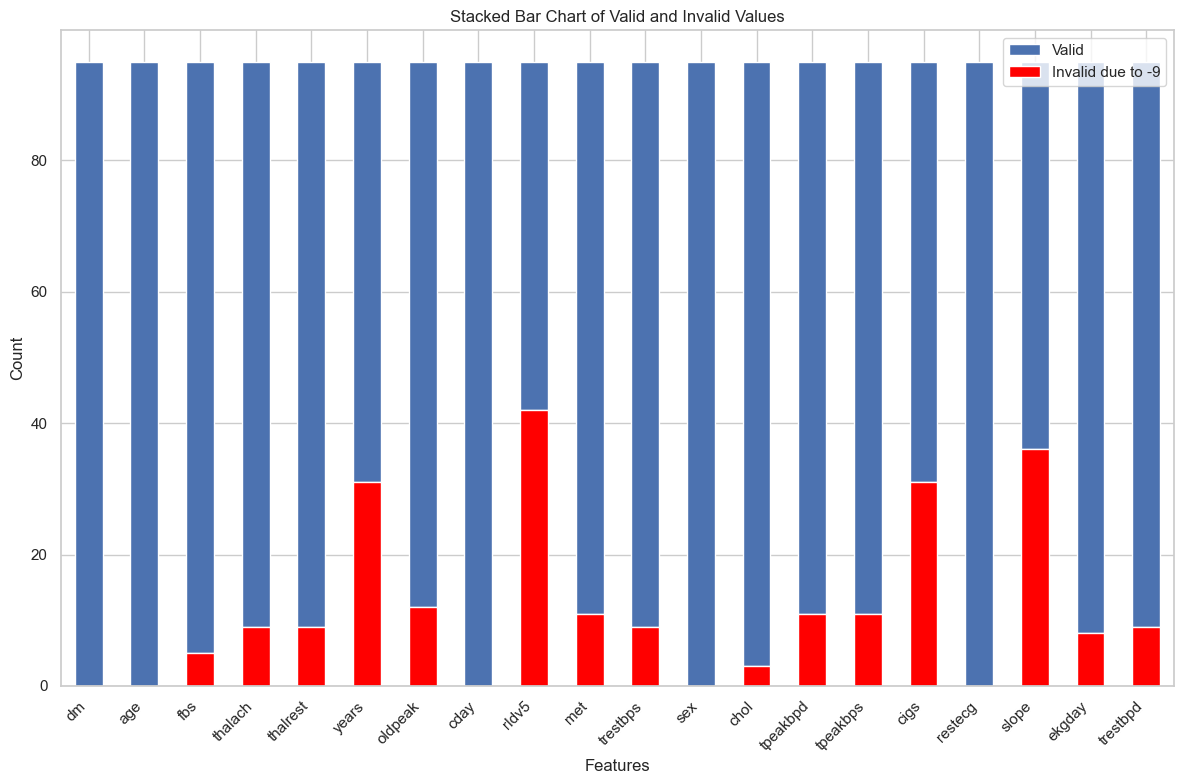

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv('cleaned_diabetes_data.csv')

invalid_due_to_minus9 = (df == -9).sum()


valid_values = df.shape[0] - invalid_due_to_minus9

summary_df = pd.DataFrame({
    'Valid': valid_values,
    'Invalid due to -9': invalid_due_to_minus9
})

fig, ax = plt.subplots(figsize=(12, 8))

summary_df['Valid'].plot(kind='bar', stacked=True, ax=ax, bottom=summary_df[['Invalid due to -9']].sum(axis=1), label='Valid')

summary_df[['Invalid due to -9']].plot(kind='bar', stacked=True, ax=ax, color=['red'], label='Invalid due to -9')
ax.set_ylabel('Count')
ax.set_xlabel('Features')
ax.set_title('Stacked Bar Chart of Valid and Invalid Values')
ax.set_xticklabels(df.columns, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()


- **Predict Missing Categorical Variable Values**

  - Use deep learning algorithms to predict missing values for **categorical variables** (e.g., `fbs`, `slope`).  
  - Ensure predicted values are correctly classified into the appropriate categories.

- **Handle Missing Continuous Variables:**  
  - Address missing values for continuous variables.  
  - Ensure the predictions are **integers** and fall within the **range of existing data**.


- Utilize **Scikit-learn's Random Forest Classifier** to fill in the missing values for categorical variables.  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
data = pd.read_csv('cleaned_diabetes_data.csv')
data.replace(-9, np.nan, inplace=True)
def fill_missing_values(df, column, possible_values):
    train = df[df[column].notna()]
    test = df[df[column].isna()]
    
    X_train = train.drop(columns=[column])
    y_train = train[column]
    X_test = test.drop(columns=[column])

    imputer = SimpleImputer(strategy='median')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_imputed, y_train)

    predicted_values = clf.predict(X_test_imputed)
    df.loc[df[column].isna(), column] = predicted_values
    return df

data = fill_missing_values(data, 'fbs', [0, 1])
data = fill_missing_values(data, 'slope', [1, 2, 3])
data.to_csv('filled_diabetes_data.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

data = pd.read_csv('filled_diabetes_data.csv')
data.replace(-9, np.nan, inplace=True)

def fill_missing_values_continuous(df, column):
    train = df[df[column].notna()]
    test = df[df[column].isna()]
    
    X_train = train.drop(columns=[column])
    y_train = train[column]
    X_test = test.drop(columns=[column])

    imputer = SimpleImputer(strategy='median')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    reg = RandomForestRegressor(n_estimators=100, random_state=42)
    reg.fit(X_train_imputed, y_train)

    predicted_values = reg.predict(X_test_imputed)
    predicted_values_rounded = np.round(predicted_values)

    min_val = df[column].min()
    max_val = df[column].max()
    predicted_values_clipped = np.clip(predicted_values_rounded, min_val, max_val)

    df.loc[df[column].isna(), column] = predicted_values_clipped
    return df
continuous_columns = ['thalach', 'thalrest', 'years', 'oldpeak', 'rldv5', 'met', 'trestbps', 'chol', 'tpeakbpd', 'tpeakbps', 'cigs', 'ekgday', 'trestbpd']
for column in continuous_columns:
    data = fill_missing_values_continuous(data, column)
data.to_csv('A_diabetes_data.csv', index=False)


## Final Data Wrangling and Validity Check
  - Performed a final **validity check** on the dataset after data wrangling.

- **Results:**  
  - **All erroneous values have been corrected.**  
  - The data now falls within the appropriate **range and distribution**.


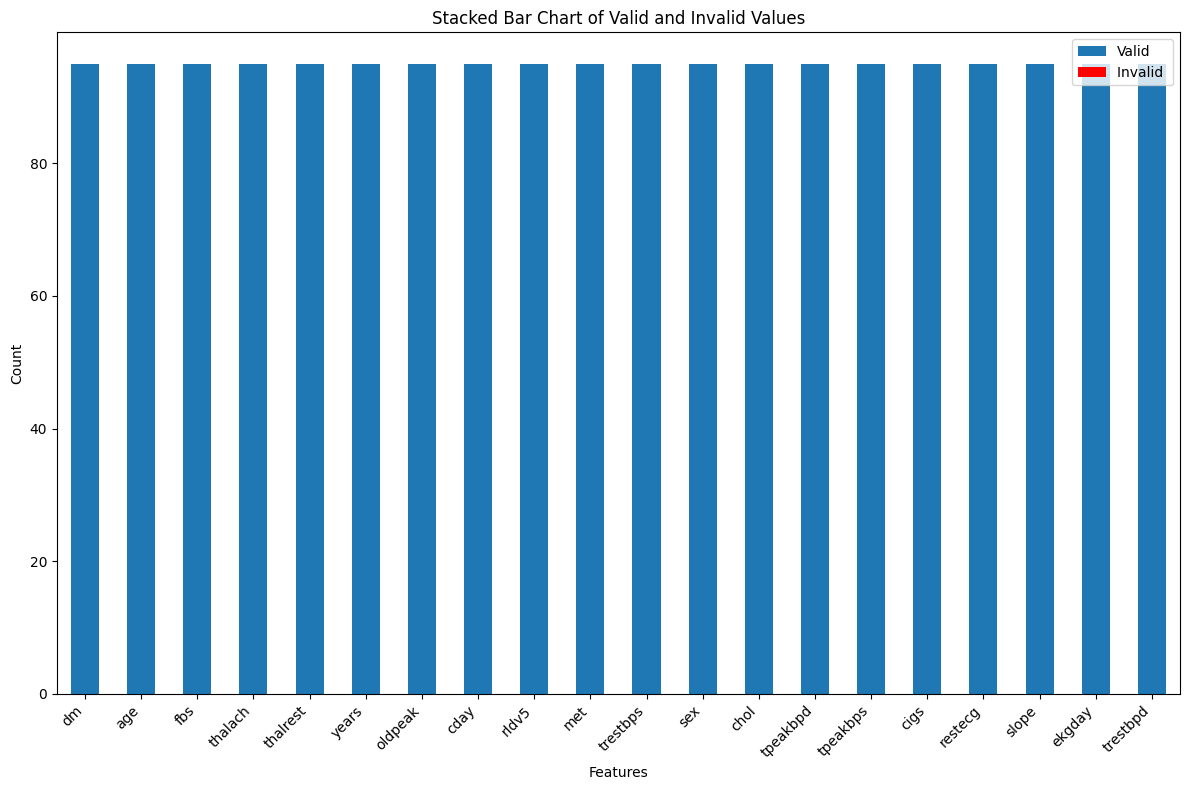

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('A_diabetes_data.csv')

invalid_due_to_minus9 = (df == -9).sum()

valid_values = df.shape[0] - invalid_due_to_minus9

summary_df = pd.DataFrame({
    'Valid': valid_values,
    'Invalid ': invalid_due_to_minus9
})

fig, ax = plt.subplots(figsize=(12, 8))

summary_df['Valid'].plot(kind='bar', stacked=True, ax=ax, bottom=summary_df[['Invalid ']].sum(axis=1), label='Valid')

summary_df[['Invalid ']].plot(kind='bar', stacked=True, ax=ax, color=['red'], label='Invalid')

ax.set_ylabel('Count')
ax.set_xlabel('Features')
ax.set_title('Stacked Bar Chart of Valid and Invalid Values')
ax.set_xticklabels(df.columns, rotation=45, ha='right')

ax.legend()

plt.tight_layout()
plt.show()


# 3.2-Data modeling results

### 1. **Decision Tree Analysis**
- **Objective:**  
  - Simulate potential variable combinations leading to diabetes.  
- **Method:**  
  - Utilized **DecisionTreeClassifier** for relationship analysis.  
- **visualization**
  - Generated a **tree-structured visualization** to present combinations potentially causing diabetes.  
  - Clearly categorized and documented the decision process.  



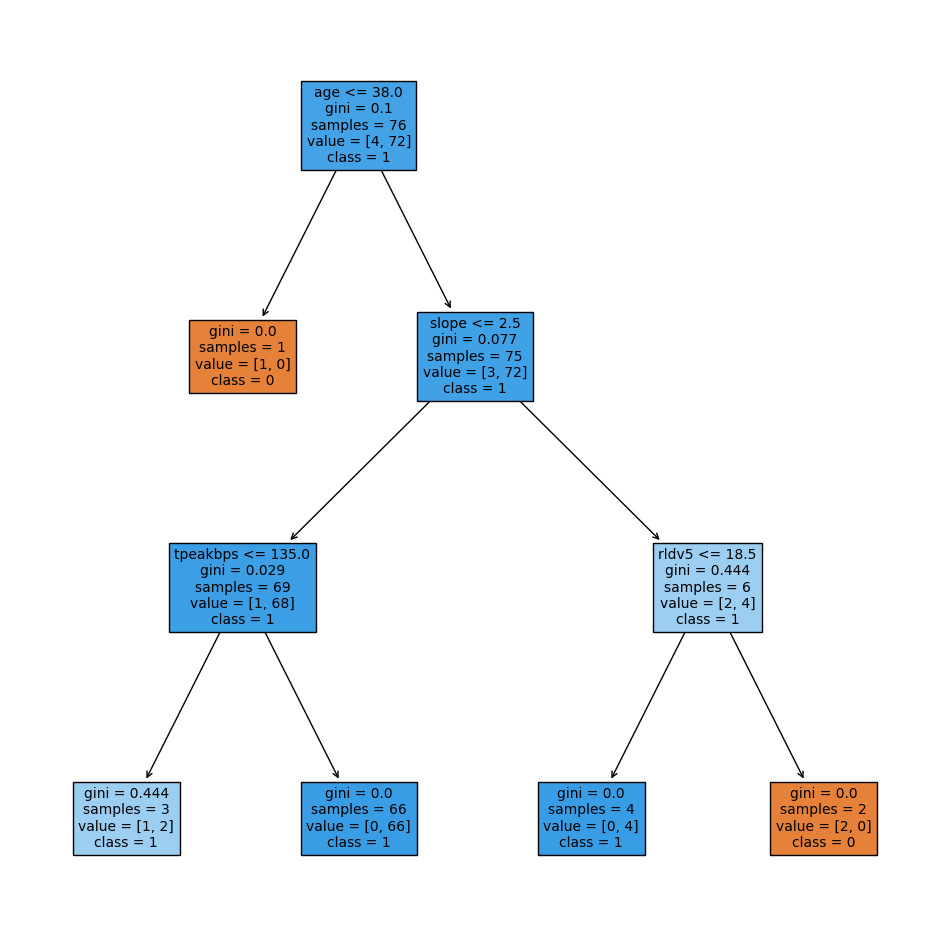

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

df = pd.read_csv('A_diabetes_data.csv')

X = df.drop('dm', axis=1)
y = df['dm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf, filled=True, fontsize=10, feature_names=X.columns, class_names=['0', '1'])
plt.show()


### 2. **Deep Learning with Combination Networks**
- **Objective:**  
  - Identify high-risk attribute combinations.  
- **Method:**  
  - Categorized attributes:  
    - **Categorical attributes** did not require further binning.  
    - **Numerical attributes** were binned into ranges for training.  
  - Built a deep learning model to train on binned attributes.  
  - Extracted high-risk attribute combinations and their internal relationships to diabetes.  
- **visualization**  
  - Created a visual representation of attribute combinations, using **red zones** to highlight areas with a higher likelihood of diabetes.  
  - These visualizations align with Professor Bernard’s binning techniques and can be applied to this project.


In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

df = pd.read_csv('A_diabetes_data.csv')

categorical_columns = ['dm', 'fbs', 'sex', 'slope', 'restecg']
continuous_columns = ['age', 'thalach', 'thalrest', 'years', 'oldpeak', 'rldv5', 'met',
                      'trestbps', 'chol', 'tpeakbpd', 'tpeakbps', 'cigs', 'trestbpd', 'ekgday','cday']

binning = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')  
binned_data = binning.fit_transform(df[continuous_columns])
binned_df = pd.DataFrame(binned_data, columns=[col + '_bin' for col in continuous_columns])

data = pd.concat([df[categorical_columns], binned_df], axis=1)

X = data.drop('dm', axis=1)
y = data['dm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

class ComboNet(nn.Module):
    def __init__(self, input_dim):
        super(ComboNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = ComboNet(input_dim=X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 200
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train).squeeze()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

with torch.no_grad():
    feature_weights = model.fc1.weight.cpu().numpy()

def decode_feature_combinations_with_dm(
    important_features, feature_names, binning, continuous_columns, original_df, target="dm"
):
    decoded = []
    dm_1_data = original_df[original_df[target] == 1]
    
    for feature_combination in important_features:
        combo_info = []
        for feature_index in feature_combination:
            feature_name = feature_names[feature_index]
            if feature_name.endswith('_bin'): 
                original_feature = feature_name.replace('_bin', '') 
                if original_feature in continuous_columns:
                    feature_index_in_continuous = continuous_columns.index(original_feature)
                    bin_edges = binning.bin_edges_[feature_index_in_continuous]

                    bin_data = pd.cut(dm_1_data[original_feature], bins=bin_edges, include_lowest=True)
                    bin_counts = bin_data.value_counts().sort_index()
                    
                    most_common_bin = bin_counts.idxmax()
                    combo_info.append(f"feature: {feature_name}, bin: {most_common_bin}")
            else:  
                unique_values = dm_1_data[feature_name].value_counts()
                most_common_value = unique_values.idxmax()  
                combo_info.append(f"feature: {feature_name}, category: {most_common_value}")
        decoded.append(combo_info)
    return decoded

decoded_features = decode_feature_combinations_with_dm(
    important_features, X.columns.tolist(), binning, continuous_columns, df
)

for i, combo in enumerate(decoded_features[:3]):  
    print(f"combination {i + 1}:")
    for feature_info in combo:
        print(f"  {feature_info}")



d:\anaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj


Epoch 100/200, Loss: 0.15292082726955414
Epoch 200/200, Loss: 0.04842934384942055
combination 1:
  feature: age_bin, bin: (28.999, 55.0]
  feature: slope, category: 2.0
  feature: cday_bin, bin: (20.667, 31.0]
  feature: thalrest_bin, bin: (67.333, 77.667]
  feature: trestbps_bin, bin: (101.999, 130.0]
  feature: cigs_bin, bin: (-0.001, 20.0]
  feature: sex, category: 1
  feature: restecg, category: 0
  feature: trestbpd_bin, bin: (64.999, 80.0]
  feature: years_bin, bin: (-0.001, 18.667]
  feature: met_bin, bin: (5.0, 8.0]
  feature: thalach_bin, bin: (139.0, 202.0]
  feature: fbs, category: 1.0
  feature: tpeakbps_bin, bin: (187.0, 230.0]
  feature: ekgday_bin, bin: (0.999, 9.0]
  feature: rldv5_bin, bin: (3.999, 12.0]
  feature: oldpeak_bin, bin: (-0.001, 1.0]
  feature: tpeakbpd_bin, bin: (10.999, 82.0]
  feature: chol_bin, bin: (250.333, 458.0]
combination 2:
  feature: age_bin, bin: (28.999, 55.0]
  feature: fbs, category: 1.0
  feature: cigs_bin, bin: (-0.001, 20.0]
  feature: r

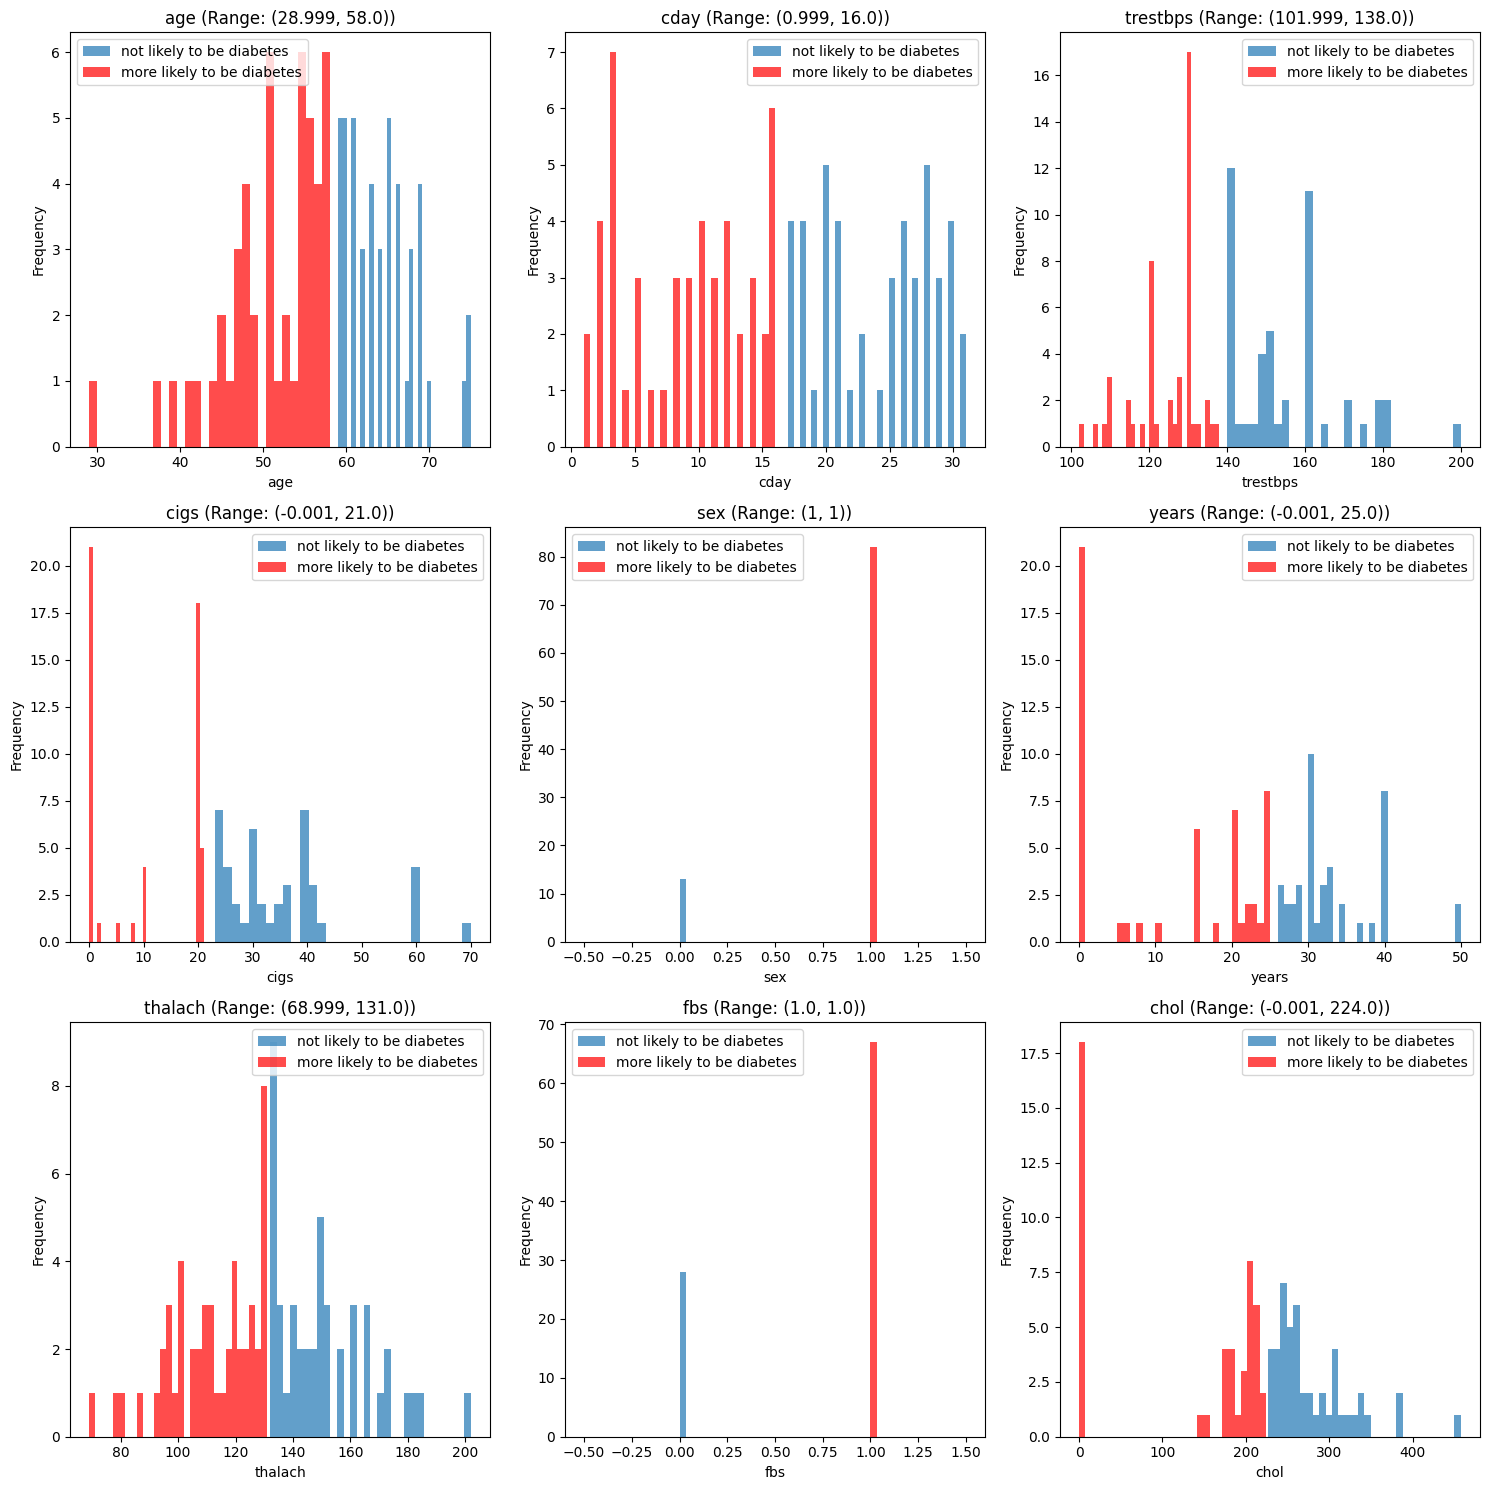

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('A_diabetes_data.csv')

features_intervals = {
    "age": (28.999, 58.0),
    "cday": (0.999, 16.0),
    "trestbps": (101.999, 138.0),
    "cigs": (-0.001, 21.0),
    "sex": (1, 1),
    "years": (-0.001, 25.0),
    "thalach": (68.999, 131.0),
    "fbs": (1.0, 1.0),
    "chol": (-0.001, 224.0)
}

num_features = len(features_intervals)
fig, axes = plt.subplots(nrows=int(np.ceil(num_features / 3)), ncols=3, figsize=(15, 5 * int(np.ceil(num_features / 3))))

axes = axes.flatten()

for i, (feature, interval) in enumerate(features_intervals.items()):
    ax = axes[i]
    if feature in df.columns:
        lower, upper = interval

        in_range = df[(df[feature] >= lower) & (df[feature] <= upper)][feature]
        out_of_range = df[(df[feature] < lower) | (df[feature] > upper)][feature]

        ax.hist(out_of_range, bins=30, alpha=0.7, label="not likely to be diabetes")

        ax.hist(in_range, bins=30, color='red', alpha=0.7, label="more likely to be diabetes")

        ax.set_title(f"{feature} (Range: {interval})")
        ax.set_xlabel(feature)
        ax.set_ylabel("Frequency")
        ax.legend()
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

### 3. **What-If Analysis Pipeline**
- **Objective:**  
  - Allow users to analyze the probability of diabetes based on a subset or full set of attributes.  
- **Method:**  
  - Designed a pipeline that dynamically analyzes the impact of selected attributes on diabetes risk.  
  - Created a visualization to demonstrate how changing certain attributes affects predictions.  
- **visualization**:  
    - Examined how variations in **age** and **cholesterol (chol)** influence diabetes probability.  
    - Results showed a **positive correlation** between increasing age/cholesterol and diabetes risk, aligning with logical expectations.  

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# 加载数据
df = pd.read_csv('A_diabetes_data.csv')

# 定义分类变量和连续变量
categorical_columns = ['fbs', 'sex', 'slope', 'restecg']
continuous_columns = ['age', 'thalach', 'thalrest', 'years', 'oldpeak', 'rldv5', 'met',
                      'trestbps', 'chol', 'tpeakbpd', 'tpeakbps', 'cigs', 'trestbpd', 'ekgday', 'cday']

# 数据预处理，包括分类变量的独热编码和连续变量的标准化
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# 目标变量
y = df['dm']
# 创建模型的管道
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(df.drop('dm', axis=1), y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)
# 评估模型
y_pred = pipeline.predict(X_test)


def predict_diabetes(input_features):
    # 创建一个与完整特征对应的空DataFrame
    data = pd.DataFrame([input_features], columns=input_features.keys())
    for col in df.columns.drop('dm'):
        if col not in data.columns:
            data[col] = None  # 对未提供的特征赋空值
    # 使用管道预测
    probability = pipeline.predict_proba(data.fillna(0))[0, 1]  # 使用0填充空值
    return probability

# 示例使用
input_features = {'age': 40, 'sex': 1, 'fbs': 1, 'chol': 205}
print("Predicted probability of diabetes:", predict_diabetes(input_features))


Predicted probability of diabetes: 0.79


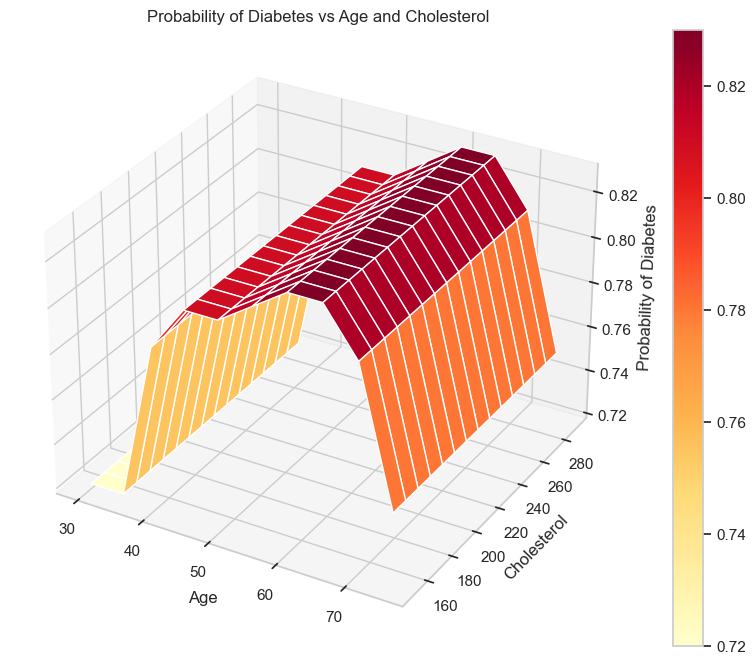

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

ages = np.arange(30, 80, 5)
chols = np.arange(150, 300, 10)
age_grid, chol_grid = np.meshgrid(ages, chols)
prob_grid = np.array([predict_diabetes({'age': age, 'chol': chol, 'sex': 0, 'trestbps': 140})
                      for age, chol in zip(np.ravel(age_grid), np.ravel(chol_grid))]).reshape(age_grid.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(age_grid, chol_grid, prob_grid, cmap='YlOrRd')
fig.colorbar(surf)
ax.set_title('Probability of Diabetes vs Age and Cholesterol')
ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Probability of Diabetes')
plt.show()


# 4-Reflection 

Data curation improved quality, identified high-risk combinations, and enabled interactive What-If analysis. Decision trees provided clear insights, deep learning revealed non-linear relationships, and the pipeline offered ultimate predictions. Limitations include reduced data, potential overfitting, and discretization errors. Solutions could involve using GANs or integrating additional datasets for enhanced robustness.